In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np
from sqlalchemy import create_engine

pd.options.display.max_rows = 100

# Random Forest Classifier Model

**Ultimatley we want our model to train with aggregated season data and a season average of the Massey Ordinal Rankings (https://masseyratings.com/faq.php)-**

**Question: Will Team1 win or lose Team2**

**Can we train our model w featured data to predict outcomes**

**This random forest model is in a format we went over in the course;
It can provide a sufficient model; while we evaluate other methods**

Classification in random forests employs an ensemble methodology to attain the outcome. The training data is fed to train various decision trees. This dataset consists of observations and features that will be selected randomly during the splitting of nodes.Random Forest is based on the bagging algorithm and is Ensemble Learning. It creates as many trees on the subset of the data and combines the output of all the trees.


**Pros: Reduces overfitting, reduces the variance and therefore improves the accuracy**

**Cons: By default, it creates 100 trees in Python sklearn library. To do so, this algorithm requires much more computational power and resources**


We have a base model we can weigh features differently and incoporate more data sources;


Ideas we want to try hopefully;

Incorporating; Stength of Schedule

or Stength of Conference/

DayNum/ Rankings?,

DataRange Filter By Season(Does more season data improve/ less?,

SeedingData,

Last14DayForm

In [2]:
## Read in our data 

## https://www.kaggle.com/competitions/mens-march-mania-2022/data?select=MDataFiles_Stage2
files = glob.glob('../mens-march-mania-2022/MDataFiles_Stage2/*')
[print(i,'\m/',f) for i,f in enumerate(files)];

0 \m/ ../mens-march-mania-2022/MDataFiles_Stage2/MNCAATourneyDetailedResults.csv
1 \m/ ../mens-march-mania-2022/MDataFiles_Stage2/MNCAATourneyCompactResults.csv
2 \m/ ../mens-march-mania-2022/MDataFiles_Stage2/MSeasons.csv
3 \m/ ../mens-march-mania-2022/MDataFiles_Stage2/MMasseyOrdinals_thruDay128.csv
4 \m/ ../mens-march-mania-2022/MDataFiles_Stage2/MRegularSeasonDetailedResults.csv
5 \m/ ../mens-march-mania-2022/MDataFiles_Stage2/MNCAATourneySlots.csv
6 \m/ ../mens-march-mania-2022/MDataFiles_Stage2/MGameCities.csv
7 \m/ ../mens-march-mania-2022/MDataFiles_Stage2/MConferenceTourneyGames.csv
8 \m/ ../mens-march-mania-2022/MDataFiles_Stage2/Cities.csv
9 \m/ ../mens-march-mania-2022/MDataFiles_Stage2/MRegularSeasonCompactResults.csv
10 \m/ ../mens-march-mania-2022/MDataFiles_Stage2/MNCAATourneySeedRoundSlots.csv
11 \m/ ../mens-march-mania-2022/MDataFiles_Stage2/MTeamConferences.csv
12 \m/ ../mens-march-mania-2022/MDataFiles_Stage2/MSampleSubmissionStage2.csv
13 \m/ ../mens-march-mania-20

# **Aggregate_Season Stats / Sets of Features for our Model//**

## Basic Offensive/Defensive Statistical Data - Split into winning and losing team 

Wins, Losses, 

Win/ Loss Location,

Winning/Losing Field Goals Made,

Winning/Losing Field Goal Attempts,

Winning/Losing Field Goal 3pters Made,

Winning/Losing Field Goal 3pter Attemtpts,

Winning/Losing Free Throws Made,

Winning/Losing Free Throws Attempted,

Winning/Losing Offensive Rebounds,

Winning/Losing Defensive Rebounds,

Winning/Losing Assists,

Winning/Losing Stls,

Winning/Losing Blocks,

Winning/Losing Personal Fouls

In [3]:
# 6) Use most updated ../mens-march-mania-2022/MDataFiles_Stage2/MRegularSeasonDetailedResults file to retrieve season results
## 03/12/2022 - Aggregate Stats into WTeamID Stats/ LTeamIDStats

SeasonResults = pd.read_csv(files[4])
SeasonResults = SeasonResults.copy()
SeasonResults = SeasonResults[SeasonResults['Season'] >= 2014].reset_index(drop=True)  
#SeasonResults

winning_cols = ['Season', 'WTeamID', 'WLoc', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF']
losing_cols = ['Season', 'LTeamID', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF']
columns = ['Season', 'TeamID', 'FGM', 'FGA', 'FGM3', 'FGA3', 'FTM', 'FTA', 'OR', 'DR', 'Ast', 'TO', 'Stl', 'Blk', 'PF']

winning_stats = SeasonResults[winning_cols].groupby(['Season', 'WTeamID']).mean().reset_index()
winning_stats.columns = columns

losing_stats = SeasonResults[losing_cols].groupby(['Season', 'LTeamID']).mean().reset_index()
losing_stats.columns = columns

reg_season_stats = pd.concat([winning_stats, losing_stats]).groupby(['Season', 'TeamID']).mean().reset_index()

reg_season_stats['id'] = reg_season_stats.Season.astype(str) + reg_season_stats.TeamID.astype(str)


reg_season_stats.head()
#reg_season_stats.to_csv('GroupProj_RegSeas_DF_N.csv', encoding='utf-8', index=False)

# 2010 - 2022

,Season,TeamID,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,id
0,2014,1101,22.868421,49.407895,5.921053,15.013158,19.026316,25.578947,7.776316,20.855263,10.671053,14.776316,7.657895,1.710526,20.644737,20141101
1,2014,1102,22.122222,51.461111,7.311111,21.555556,14.155556,20.172222,8.911111,23.466667,13.461111,13.627778,5.466667,3.061111,18.494444,20141102
2,2014,1103,23.125000,54.601190,6.910714,20.505952,13.285714,21.523810,12.488095,21.988095,10.672619,13.380952,6.404762,3.988095,17.946429,20141103
3,2014,1104,23.192982,51.719298,5.989035,17.379386,15.600877,22.938596,9.905702,22.903509,11.138158,11.883772,7.050439,4.291667,18.640351,20141104
4,2014,1105,21.822917,52.979167,6.166667,18.708333,14.927083,22.541667,10.010417,24.197917,12.750000,13.239583,6.093750,4.156250,21.822917,20141105


In [4]:
# # # # 2003 - 2010
# massey_ratings = pd.read_csv(files[3])
# massey_ratings = massey_ratings[massey_ratings['Season'] >= 2015].reset_index(drop=True) 
# massey_ratings.drop('SystemName', axis=1, inplace=True)
# #massey_ratings = massey_ratings.groupby(['Season', 'TeamID'])

# #massey_ratings = massey_ratings.reset_index()
# massey_ratings['id'] = massey_ratings.Season.astype(str) + massey_ratings.TeamID.astype(str)

# massey_ratings.head()

## Add Massey Ranks and aggregate the Ordinal Rank into Mean, Min, Max 

Massey Ordinal Rank gives us a team rank for every DayNum in the College Basketball Season.

**In addition to using reg_season_stats/ statistics for each team- We will use Massey's Ordinal Rank to provide a strength indicator for our model;**

The "Massey Ordinal Rank " This file lists out rankings (e.g. #1, #2, #3, ..., #N) of teams going back to the 2002-2003 season, under a large number of different ranking system methodologies. The information was gathered by Kenneth Massey and provided on his College Basketball Ranking Composite page. https://www.masseyratings.com/cb/compare.htm

 
**Pros: Instead of training from DayNum and ranking by day throughout the year; take min, max, avg. by 'Season' & 'TeamID' and train model on massey ordinal rankings by ex: Season(2010) and TeamID. --Is a quick efficient way to snapshot a teams rank by yr**
 
 Kaggle also admits their rankings are submitted at different days of the week sometimes behind games etc
 
 Another reason to take a teams average rank(Ordinal Rank)
 https://www.kaggle.com/competitions/mens-march-mania-2022/data
 
 **Cons: 
 High Seeded Teams/ Cinderella teams where rankings are low/ weighing them down ?,**
 
 **Taking a min, max, avg ranking is again weighing teams outside of top 25 heavily down, we would assume**
 
**Also this is an order rank, if we had a rating rank that could differentiate teams better by strength, that would improve the model we think**

In [5]:
# Read in Massey Rankings up to day 128 - Shows Teams and Massey Rankings by day in the 2003-2022 seasons

ranks = pd.read_csv(files[3])

# ['RankingDayNum'] == 133 - Because we only want Rankings leading up to the tournament

ranks = ranks[ranks['Season'] >= 2014].reset_index(drop=True)  
#ranks = ranks[ranks['RankingDayNum'] == 133].reset_index(drop=True)  

aggregate_ranks = ranks.groupby(['Season', 'TeamID']).agg({'OrdinalRank': ['mean', 'min', 'max']})
aggregate_ranks.columns = ['_'.join(col) for col in aggregate_ranks.columns]

massey_Ranks = aggregate_ranks.reset_index()
massey_Ranks['id'] = massey_Ranks.Season.astype(str) + massey_Ranks.TeamID.astype(str)
massey_Ranks

,Season,TeamID,OrdinalRank_mean,OrdinalRank_min,OrdinalRank_max,id
0,2014,1101,331.861004,103,351,20141101
1,2014,1102,225.676755,85,339,20141102
2,2014,1103,111.515738,43,216,20141103
3,2014,1104,100.805085,34,211,20141104
4,2014,1105,305.715496,201,345,20141105
...,...,...,...,...,...,...
3171,2022,1468,206.520604,113,332,20221468
3172,2022,1469,271.579670,175,342,20221469
3173,2022,1470,220.846154,122,345,20221470
3174,2022,1471,238.221154,34,313,20221471


In [6]:
# # 9) Extract tourney data

# TourneyCompactResults = pd.read_csv(files[1])
# TourneyCompactResults = TourneyCompactResults[TourneyCompactResults['Season'] >= 2010].reset_index(drop=True) 
# TourneyCompactResults

# Combine Features

In [7]:
def is_winning(wteam, lteam):
    if wteam < lteam:
        return 1
    else:
        return 0
    
    
march_tourney = pd.read_csv(files[1])
march_tourney = march_tourney[march_tourney['Season'] >= 2014].reset_index(drop=True) 

train = march_tourney

train['is_win'] = train.apply(lambda x: is_winning(x['WTeamID'], x['LTeamID']), axis=1)
train['team_a'] = train.Season.astype(str) + train.WTeamID.astype(str)
train['team_b'] = train.Season.astype(str) + train.LTeamID.astype(str)

train = train.drop(['WScore', 'LScore'], axis=1)
train = pd.merge(train, massey_Ranks, left_on='team_a', right_on='id').merge(massey_Ranks, left_on='team_b', right_on='id', suffixes=('_teama', '_teamb'))

train = train.drop(['Season_x', 'Season_y', 'id_teama', 'id_teamb', 'TeamID_teama', 'TeamID_teamb'], axis=1)
train = pd.merge(train, reg_season_stats, left_on='team_a', right_on='id').merge(reg_season_stats, left_on='team_b', right_on='id', suffixes=('_teama', '_teamb'))

train = train.drop(['Season_x', 'Season_y', 'team_a', 'team_b', 'TeamID_teama', 'TeamID_teamb', 'id_teama', 'id_teamb'], axis=1)
train = train.drop(['DayNum', 'WTeamID', 'LTeamID', 'NumOT', 'Season', 'WLoc'], axis=1)

print(train.shape)
train.count()

(468, 33)


is_win                    468
OrdinalRank_mean_teama    468
OrdinalRank_min_teama     468
OrdinalRank_max_teama     468
OrdinalRank_mean_teamb    468
OrdinalRank_min_teamb     468
OrdinalRank_max_teamb     468
FGM_teama                 468
FGA_teama                 468
FGM3_teama                468
FGA3_teama                468
FTM_teama                 468
FTA_teama                 468
OR_teama                  468
DR_teama                  468
Ast_teama                 468
TO_teama                  468
Stl_teama                 468
Blk_teama                 468
PF_teama                  468
FGM_teamb                 468
FGA_teamb                 468
FGM3_teamb                468
FGA3_teamb                468
FTM_teamb                 468
FTA_teamb                 468
OR_teamb                  468
DR_teamb                  468
Ast_teamb                 468
TO_teamb                  468
Stl_teamb                 468
Blk_teamb                 468
PF_teamb                  468
dtype: int

**Model forming** 

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = train.drop(['is_win'], axis=1)
y = train.is_win

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.67      0.70        57
           1       0.55      0.62      0.58        37

    accuracy                           0.65        94
   macro avg       0.64      0.64      0.64        94
weighted avg       0.66      0.65      0.65        94



In [10]:
# create feature importances from model
importances = model.feature_importances_

# get column names
columns = X.columns

# create a dataframe
feature_importances_df = pd.DataFrame({
    'feature': columns,
    'importance': importances
}) 


feature_importance = feature_importances_df.sort_values(by=['importance'], ascending=False, inplace=True)
feature_importance = feature_importances_df.reset_index(drop=True, inplace=True)
feature_importance = feature_importances_df.head(10)
feature_importance

,feature,importance
0,Stl_teama,0.043289
1,Stl_teamb,0.039765
2,Blk_teama,0.037987
3,TO_teamb,0.037741
4,FGM_teamb,0.036319
5,OR_teama,0.036101
6,FTM_teama,0.035935
7,PF_teama,0.035505
8,FGM_teama,0.034978
9,FGA3_teama,0.034710


Text(0.5, 1.0, 'Top Ten Feature importances')

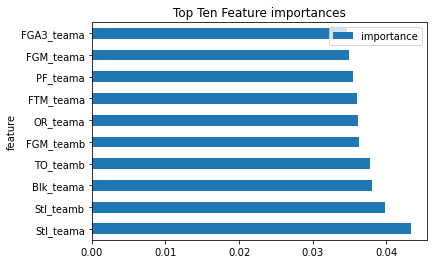

In [11]:
# visualize the top ten feature-importances_

feature_importance.plot.barh(x="feature", y="importance")
plt.title("Top Ten Feature importances")
#plt.savefig("./Resources/rf_feature_importance.png")

In [12]:
def return_value(data, data_type=None):
    data = data.split('_')
    if data_type == 'Team A':
        return str(data[0]) + str(data[1])
    else:
        return str(data[0]) + str(data[2])

In [13]:
test = pd.read_csv(files[12])
test

,ID,Pred
0,2022_1103_1104,0.5
1,2022_1103_1112,0.5
2,2022_1103_1116,0.5
3,2022_1103_1120,0.5
4,2022_1103_1124,0.5
...,...,...
2273,2022_1458_1461,0.5
2274,2022_1458_1463,0.5
2275,2022_1460_1461,0.5
2276,2022_1460_1463,0.5


In [14]:

test['team_a'] = test.apply(lambda x: return_value(x.ID, 'Team A'), axis=1)
test['team_b'] = test.apply(lambda x: return_value(x.ID), axis=1)
test = pd.merge(test, massey_Ranks, left_on='team_a', right_on='id').merge(massey_Ranks, left_on='team_b', right_on='id', suffixes=('_teama', '_teamb'))
test = pd.merge(test, reg_season_stats, left_on='team_a', right_on='id').merge(reg_season_stats, left_on='team_b', right_on='id', suffixes=('_teama', '_teamb'))
test = test.drop(['Season_teama', 'Season_teamb', 'team_a', 'team_b', 'TeamID_teama', 'TeamID_teamb', 'id_teama', 'id_teamb'], axis=1)

test

/Users/apple/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/pandas/core/frame.py:9203: FutureWarning: Passing 'suffixes' which cause duplicate columns {'id_teama', 'TeamID_teama', 'Season_teama'} in the result is deprecated and will raise a MergeError in a future version.
  validate=validate,


,ID,Pred,OrdinalRank_mean_teama,OrdinalRank_min_teama,OrdinalRank_max_teama,OrdinalRank_mean_teamb,OrdinalRank_min_teamb,OrdinalRank_max_teamb,FGM_teama,FGA_teama,...,FGA3_teamb,FTM_teamb,FTA_teamb,OR_teamb,DR_teamb,Ast_teamb,TO_teamb,Stl_teamb,Blk_teamb,PF_teamb
0,2022_1103_1104,0.5,142.390110,51,327,17.380764,1,51,22.851010,52.699495,...,30.309717,15.255061,20.943320,11.684211,24.374494,14.514170,14.115385,6.987854,4.605263,18.840081
1,2022_1103_1112,0.5,142.390110,51,327,4.730323,1,51,22.851010,52.699495,...,23.005376,14.145161,19.500000,10.693548,26.989247,17.091398,14.172043,5.634409,4.784946,17.462366
2,2022_1104_1112,0.5,17.380764,1,51,4.730323,1,51,27.370445,62.850202,...,23.005376,14.145161,19.500000,10.693548,26.989247,17.091398,14.172043,5.634409,4.784946,17.462366
3,2022_1103_1116,0.5,142.390110,51,327,33.667105,3,147,22.851010,52.699495,...,21.775000,16.817500,22.427500,9.630000,24.002500,13.847500,13.035000,7.480000,3.950000,17.792500
4,2022_1104_1116,0.5,17.380764,1,51,33.667105,3,147,27.370445,62.850202,...,21.775000,16.817500,22.427500,9.630000,24.002500,13.847500,13.035000,7.480000,3.950000,17.792500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2273,2022_1437_1463,0.5,12.607742,1,88,156.880495,59,335,23.601648,56.975275,...,21.750000,13.573232,18.616162,7.416667,25.161616,11.631313,12.828283,5.840909,3.191919,18.108586
2274,2022_1439_1463,0.5,51.533516,2,132,156.880495,59,335,25.222826,55.215580,...,21.750000,13.573232,18.616162,7.416667,25.161616,11.631313,12.828283,5.840909,3.191919,18.108586
2275,2022_1458_1463,0.5,23.186198,2,144,156.880495,59,335,24.544643,59.693452,...,21.750000,13.573232,18.616162,7.416667,25.161616,11.631313,12.828283,5.840909,3.191919,18.108586
2276,2022_1460_1463,0.5,211.928571,79,350,156.880495,59,335,26.825000,59.080769,...,21.750000,13.573232,18.616162,7.416667,25.161616,11.631313,12.828283,5.840909,3.191919,18.108586


In [15]:
X = test.drop(['ID', 'Pred'], axis=1)

test['Pred'] = model.predict_proba(X)[:, 1]
test = test[['ID', 'Pred']]
test

,ID,Pred
0,2022_1103_1104,0.39
1,2022_1103_1112,0.42
2,2022_1104_1112,0.65
3,2022_1103_1116,0.44
4,2022_1104_1116,0.74
...,...,...
2273,2022_1437_1463,0.53
2274,2022_1439_1463,0.49
2275,2022_1458_1463,0.53
2276,2022_1460_1463,0.42


In [16]:
#test.to_csv('Random_Forest_Yr_Acc/RFM_2014.csv', index=False)
pd.read_csv('Random_Forest_Yr_Accuracy/RFM_2014.csv')

,ID,Pred
0,2022_1103_1104,0.39
1,2022_1103_1112,0.42
2,2022_1104_1112,0.65
3,2022_1103_1116,0.44
4,2022_1104_1116,0.74
...,...,...
2273,2022_1437_1463,0.53
2274,2022_1439_1463,0.49
2275,2022_1458_1463,0.53
2276,2022_1460_1463,0.42
